In [7]:
# İK Veri Analizi ve Stratejik Öngörüler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Veriyi yüklüyoruz
df = pd.read_csv(r"C:\Users\HP\OneDrive\Masaüstü\veri analizi\employee_hr_dataset.csv")

In [9]:
# Genel görünüm ayarlarını yapıyoruz
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style("whitegrid")

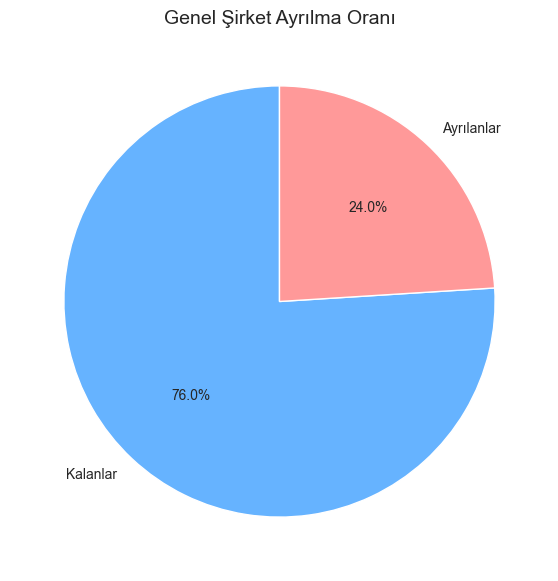

Toplam Çalışan: 500
Ayrılan Sayısı: 120
Kalan Sayısı: 380
------------------------------


In [10]:
# Analiz ve grafiklerle görselleştirme aşamasındayız
#  Şirketten Ayrılma Oranı (Pasta Grafiği)
plt.figure(figsize=(7, 7))
counts = df['left_company'].value_counts()
plt.pie(counts, 
        labels=['Kalanlar', 'Ayrılanlar'], 
        autopct='%1.1f%%', 
        colors=['#66b3ff', '#ff9999'], 
        startangle=90)
plt.title('Genel Şirket Ayrılma Oranı', fontsize=14)
plt.show()

print(f"Toplam Çalışan: {len(df)}")
print(f"Ayrılan Sayısı: {counts[1]}")
print(f"Kalan Sayısı: {counts[0]}")
print("-" * 30)

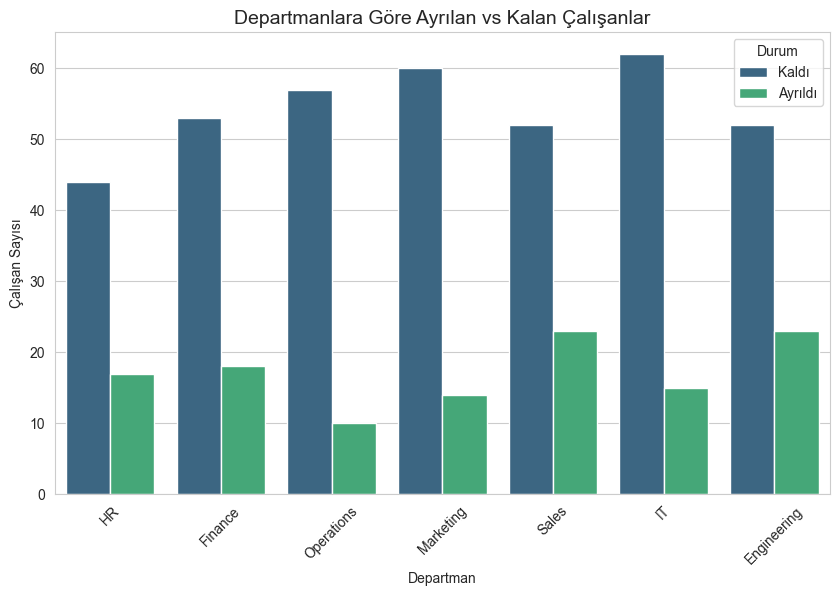

In [11]:
# Departman Bazlı Ayrılmalar (Sütun Grafiği)
plt.figure(figsize=(10, 6))
# Kimin gidip kimin kaldığını departmanlara göre renkli gösterelim
sns.countplot(data=df, x='department', hue='left_company', palette='viridis')
plt.title('Departmanlara Göre Ayrılan vs Kalan Çalışanlar', fontsize=14)
plt.xlabel('Departman')
plt.ylabel('Çalışan Sayısı')
plt.legend(title='Durum', labels=['Kaldı', 'Ayrıldı'])
plt.xticks(rotation=45)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_13736\3993042059.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_satisfaction.index, y=avg_satisfaction.values, palette='coolwarm')


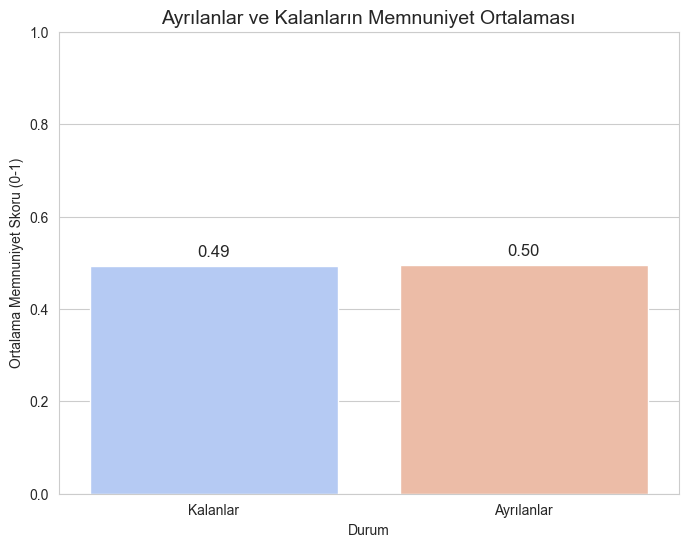

In [12]:
# Memnuniyet Karşılaştırması (Bar Grafiği)
# Ayrılanlar ile kalanların memnuniyet ortalamasını hesaplayalım
avg_satisfaction = df.groupby('left_company')['satisfaction_score'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=avg_satisfaction.index, y=avg_satisfaction.values, palette='coolwarm')
plt.title('Ayrılanlar ve Kalanların Memnuniyet Ortalaması', fontsize=14)
plt.xlabel('Durum')
plt.ylabel('Ortalama Memnuniyet Skoru (0-1)')
plt.xticks([0, 1], ['Kalanlar', 'Ayrılanlar'])
plt.ylim(0, 1)
# Skoru 0 ile 1 arasında sabitleyelim
for index, value in enumerate(avg_satisfaction):
    plt.text(index, value + 0.02, f"{value:.2f}", ha='center', fontsize=12)
plt.show()